In [1]:
# FIRST PART
# 1. The word: phonological segments
# 2. The verse: prosody
# 3. The text: metatextual structure

In [2]:
from libscansion import transcribe, nlp, silabas as slbs
from silabeador import silabea
from re import sub

2021-12-03 12:10:28 WARNING: Language es package ancora expects mwt, which has been added
2021-12-03 12:10:28 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | ancora  |

2021-12-03 12:10:28 INFO: Use device: cpu
2021-12-03 12:10:28 INFO: Loading: tokenize
2021-12-03 12:10:29 INFO: Loading: mwt
2021-12-03 12:10:29 INFO: Loading: pos
2021-12-03 12:10:29 INFO: Loading: lemma
2021-12-03 12:10:29 INFO: Loading: depparse
2021-12-03 12:10:29 INFO: Loading: ner
2021-12-03 12:10:30 INFO: Done loading processors!


In [3]:
# A verse
# Let's make a list of it
text = 'Sueña el rico en su riqueza,'.split()

In [4]:
text

['Sueña', 'el', 'rico', 'en', 'su', 'riqueza,']

In [5]:
# Hyphenation (orthographic spelling)
silabea('Sueña')

['Sue', 'ña']

In [6]:
syllables = []
[syllables.append(silabea(word)) for word in text]
syllables

[['Sue', 'ña'], ['el'], ['ri', 'co'], ['en'], ['su'], ['ri', 'que', 'za,']]

In [7]:
# Phonological transcription (almost)
transcribe('Sueña')

["'swe", 'ɲa']

In [8]:
phonemes = []
[phonemes.append(
    transcribe(sub(r'[^\w\s]','',word)))
               for word in text]
phonemes

[["'swe", 'ɲa'], ["'el"], ["'ri", 'ko'], ["'en"], ["'su"], ['ri', "'ke", 'θa']]

In [9]:
for word in text:
    print(word)
    w = sub(r"[^\w\s]","",word)
    print(f'"{w}"')
    print(transcribe(w))

Sueña
"Sueña"
["'swe", 'ɲa']
el
"el"
["'el"]
rico
"rico"
["'ri", 'ko']
en
"en"
["'en"]
su
"su"
["'su"]
riqueza,
"riqueza"
['ri', "'ke", 'θa']


In [10]:
morphosyntax = nlp('Sueña el rico en su riqueza')
morphosyntax

[
  [
    {
      "id": 1,
      "text": "Sueña",
      "lemma": "soñar",
      "upos": "VERB",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
      "head": 0,
      "deprel": "root",
      "start_char": 0,
      "end_char": 5,
      "ner": "O"
    },
    {
      "id": 2,
      "text": "el",
      "lemma": "el",
      "upos": "DET",
      "feats": "Definite=Def|Gender=Masc|Number=Sing|PronType=Art",
      "head": 3,
      "deprel": "det",
      "start_char": 6,
      "end_char": 8,
      "ner": "O"
    },
    {
      "id": 3,
      "text": "rico",
      "lemma": "rico",
      "upos": "ADJ",
      "feats": "Gender=Masc|Number=Sing",
      "head": 1,
      "deprel": "nsubj",
      "start_char": 9,
      "end_char": 13,
      "ner": "O"
    },
    {
      "id": 4,
      "text": "en",
      "lemma": "en",
      "upos": "ADP",
      "head": 6,
      "deprel": "case",
      "start_char": 14,
      "end_char": 16,
      "ner": "O"
    },
    {
      "id": 5,
      "te

In [11]:
prosody = []
for idx, word in enumerate(phonemes):
    stressed = False
    if morphosyntax.sentences[0].words[idx].upos in ['VERB', 'NOUN', 'ADJ']:
        stressed = True
    prosody.append((word, stressed))
prosody

[(["'swe", 'ɲa'], True),
 (["'el"], False),
 (["'ri", 'ko'], True),
 (["'en"], False),
 (["'su"], False),
 (['ri', "'ke", 'θa'], True)]

In [12]:
# Probable lenghts
length = [8, 11, 77]

In [13]:
# Verse parsing
verso = slbs('Sueña el rico en su riqueza', length)


Versión: 0.1.1beta1



In [14]:
# Prosodic stress
verso.silabasmetricas

[['swE', 'ɲàel'], ['rI', 'kòen'], ['su'], ['ri', 'kE', 'θa']]

In [15]:
verso.ritmo

'+-+---+-'

In [16]:
verso.rima

'keθa'

In [17]:
verso.ason

'ea'

In [18]:
verso.ml

8

In [19]:
verso.nucleosilabico

['E', 'e', 'I', 'e', 'u', 'i', 'E', 'a']

In [20]:
verso.ambiguo

0

In [21]:
########################################

In [22]:
# SECOND PART --+---+-

In [23]:
########################################3
# 1. Modules
# 2. Optional visualisation variables
# 3. Preprocessing functions
# 4. Tabular functions
# 5. Statistic functions
# 6. Body

In [24]:
# 1. MODULES

In [25]:
# Import modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import collections
import re
from statsmodels.multivariate.manova import MANOVA

In [26]:
# 2. VISUALISATION VARIABLES
# Number of lines shown &c.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [27]:
# 3. PREPROCESSING FUNCTIONS

In [28]:
def corrigetabla(data):
    data['Vocal'] = ''
    columnas = ['ac1','ac2','ac3','ac4','ac5','ac6','ac7','ac8','ac9','ac10','ac11','ac12','ac13','ac14','ac15']
    data['Ritmo'] = data['Ritmo'].str.replace('+','X').str.replace('-','o')
    for columna in columnas:
        data[columna] = data[columna].astype(str).fillna('')
    for index, row in data.iterrows():
        for columna in columnas:
            if len(row[columna]) == 0:
                data.at[index, columna] = ''
            data.at[index, columna] = re.sub('([AEIOU])[aeiou]', '\1', row[columna]).lower()
            data.at[index, columna] = re.sub('[aeiou]([AEIOU])', '\1', row[columna]).lower()
            data.at[index, columna] = re.sub('([aeiou])[iu]', '\1', row[columna]).lower()
            data.at[index, columna] = re.sub('([iu])([aeo])', '\1', row[columna]).lower()
            data.at[index, columna] = re.sub('([AEIOU])[IU]', '\1', row[columna]).lower()
            data.at[index, columna] = re.sub('[IU]([AEO])', '\1', row[columna]).lower()
        letras = ''.join(row[columnas]).replace('<na>','').strip()
        a = collections.Counter(letras).most_common(1)[0][0]
        data.at[index,'Vocal'] = a
    return data

In [29]:
# 4. TABULAR FUNCTIONS

In [30]:
def samples(data, authors, nsamples):
    import numpy as np
    sample = pd.DataFrame()
    for i in authors:
        g = data.loc[data['Author'] == i].groupby('Title')
        a = np.arange(g.ngroups)
        np.random.shuffle(a)
        sample = sample.append(data.loc[df['Author'] == i][g.ngroup().isin(a[:nsamples])])
    return sample

In [31]:
def muestrasiguales(data, i=0):
    resultado = pd.DataFrame()
    obras = pd.unique(data['Pieza'])
    if i == 0:
        menor = min([len(data[data['Pieza'] == obra]) for obra in obras])
    else:
        menor = 100
    for obra in obras:
        resultado = resultado.append(
            data[data['Pieza'] == obra].sample(n=menor, random_state = 42), ignore_index=True
        )
    return (resultado, menor)

In [32]:
def recount(data, columna):
    dfritmo = pd.DataFrame()
    valores = pd.unique(data[columna])
    obras = pd.unique(data['Title'])
    for obra in obras:
        nversos = len(data[data['Title'] == obra])
        cuentas = {}
        autor =  data.loc[data['Title'] == obra]['Author'].value_counts()[:1].index.tolist()[0]
        for valor in valores:
            fila = {'Title': obra, 'Author': autor}
            cuenta = len(data.loc[data['Title'] == obra][data[columna] == valor])
            relcuenta = cuenta/nversos
            fila = {'Title': obra, 'Author': autor, columna: valor, 'Count': cuenta, 'RelCount' : relcuenta}
            if cuenta > 0:           
                dfritmo = dfritmo.append(fila, ignore_index=True)
    return dfritmo.convert_dtypes()

In [33]:
def longformat(data, columna, cuenta='Count'):
    dflargo = pd.DataFrame()
    obras = pd.unique(data['Title'])
    variables = pd.unique(data[columna])
    calderon = lope = mira = 0
    for obra in obras:
        subconjunto = data[data['Title'] == obra]
        autor = max(subconjunto['Author'])
        fila = {'Author': autor, 'Title': obra}
        for var in variables:
            suma = subconjunto[subconjunto[columna] == var]['Count'].sum()
            fila.update({var: suma})
        dflargo = dflargo.append(fila, ignore_index=True)
    return dflargo.convert_dtypes()

In [34]:
def recorta(data, minimo):
    for valor in data.columns:
        #if valor != 'Autor' and valor != 'Pieza':
        if data[valor].dtype.kind in 'biufc':
            if data[valor].sum() < minimo:
                data = data.drop(columns=valor)
    return data.convert_dtypes()

In [35]:
def min_freq(data, columna, minimo):
    return data.groupby(columna).filter(lambda x : (x[columna].count()>=minimo).any()).convert_dtypes()

In [36]:
def borra(data, columna, ritmosx):
    obras = pd.unique(data['Pieza'].values)
    ritmosa = pd.unique(data[columna].values)
    for ritmo in ritmosa:
        if ritmo not in ritmosx:
            data = data.loc[a[columna] != ritmo]
        else:
            for autor in ['Calderón', 'Mira', 'Lope']:
                if ritmo not in data.loc[data['Autor'] == autor][columna].values:
                    data = data.loc[data[columna] != ritmo]
            if len(data[data[columna] == ritmo]) < 20 or data.loc[data[columna] == ritmo]['RelCuenta'].max() < 0.05:
                data = data.loc[data[columna] != ritmo]
    return data

In [37]:
def borrar(data, columna, lista = []):
    data = data.loc[~data['Autor'].isin(control)]
    data = data.loc[~data['Pieza'].str.startswith('z', na=False)]
    obras = pd.unique(data['Pieza'].values)
    x = data.loc[data['Autor'].isin(dudosos)]
    a = data.loc[~data['Autor'].isin(dudosos)]
    if len(lista) == 0:
        ritmosx = pd.unique(x[columna].values)
        ritmosa = pd.unique(a[columna].values)
    else:
        return data.loc[data[columna].isin(lista)]
    for ritmo in ritmosa:
        if ritmo not in ritmosx:
            a = a.loc[a[columna] != ritmo]
        else:
            for autor in ['Calderón', 'Mira', 'Lope']:
                if ritmo not in a.loc[a['Autor'] == autor][columna].values:
                    a = a.loc[a[columna] != ritmo]
            if len(a[a[columna] == ritmo]) < 4 or a.loc[a[columna] == ritmo]['Cuenta'].max() < 4:
                a = a.loc[a[columna] != ritmo]
    dfritmo = pd.DataFrame()
    valores = pd.unique(data[columna])
    obras = pd.unique(data['Pieza'])
    for obra in obras:
        cuentas = {}
        autor =  data[data['Pieza'] == obra]['Autor'].value_counts()[:1].index.tolist()[0]
        for valor in valores:
            fila = {'Pieza': obra, 'Autor': autor}
            cuenta = len(data[data['Pieza'] == obra][data[columna] == valor])
            fila = {'Pieza': obra, 'Autor': autor, columna: valor, 'Cuenta': cuenta, 'RelCuenta' : cuenta/len(obra)}
            if cuenta > 0:           
                dfritmo = dfritmo.append(fila, ignore_index=True)
    return dfritmo.convert_dtypes()

In [38]:
#5. STATISTIC FUNCTIONS

In [39]:
def analyse(data, j_test=pd.DataFrame(), analisis='k', test=0.2, alea = 42, plot='rbf', n=3):
    X = data.drop('Author', axis=1).values
    y = data['Author'].values
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=alea)
    if analisis == 'k':
        from sklearn.neighbors import KNeighborsClassifier
        neighbors = np.arange(1,12)
        train_accuracy =np.empty(len(neighbors))
        test_accuracy = np.empty(len(neighbors))    
        for i,k in enumerate(neighbors):
            modelo = KNeighborsClassifier(n_neighbors=k)
            modelo.fit(X_train,y_train)
            train_accuracy[i] = modelo.score(X_train,y_train)
            test_accuracy[i] = modelo.score(X_test, y_test)
        if plot == 'y':
            plt.rcParams["figure.figsize"] = (10,8)
            plt.title('k-NN number of neighbours')
            plt.plot(neighbors, test_accuracy, label='Test Accuracy')
            plt.plot(neighbors, train_accuracy, label='Training accuracy')
            plt.legend()
            plt.xlabel('Number of neighbours')
            plt.ylabel('Accuracy')
            plt.show()
        else:
            print(test_accuracy)
        modelo = KNeighborsClassifier(n_neighbors=n)
        modelo.fit(X_train,y_train)
    elif analisis == 'r':
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
    
        j_test = sc.transform(j_test)
        from sklearn.linear_model import LogisticRegression
        modelo = LogisticRegression(max_iter=1000,  random_state=alea)
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
    elif analisis == 's':
        from sklearn import svm
        modelo = svm.SVC(kernel=plot)
        modelo.fit(X_train,y_train)
    else:
        return False
    from sklearn.metrics import classification_report
    print(f'Score: {modelo.score(X_test,y_test)}')
    from sklearn.metrics import confusion_matrix
    y_pred = modelo.predict(X_test)
    print(modelo.predict(j_test))
    return modelo

In [40]:
def creaformula(columna, data):
    variables = []
    lista = pd.unique(data[columna])
    for idx, elemento in enumerate(lista):
        if idx == 0:
            formula = f'{elemento} ~ Autor'
        else:
            formula = f'{elemento} + {formula}'
        variables += [elemento]
    return formula

In [41]:
#6. IT STARTS HERE

In [42]:
# Load input file
entrada = 'data.csv'
df = pd.read_csv(entrada)
df['Rhythm'] = df['Rhythm'].str.replace('+','X').str.replace('-','o')
df.head()

,Author,Title,Genre,Subgenre,Act,Speech,Verse,Character,Type,Gender,Text,Syllables,Ambiguous,Nuclei,Assonance,Consonance,Rhythm
0,Lope,Auto del pan y el palo,Auto sacramental,ø,0,1,1,BUEN AÑO,NaN,M,"Espérate, Regocijo,",8,0,eEaeeoIo,io,θixo,oXooooXo
1,Lope,Auto del pan y el palo,Auto sacramental,ø,0,1,2,BUEN AÑO,NaN,M,que el viento en las plantas llevas.,8,0,eEeaAaEa,ea,ʎebas,oXooXoXo
2,Lope,Auto del pan y el palo,Auto sacramental,ø,0,2,3,REGOCIJO,NaN,M,Engéndranme buenas nuevas,8,0,eEaeEaEa,ea,nwebas,oXooXoXo
3,Lope,Auto del pan y el palo,Auto sacramental,ø,0,2,4,REGOCIJO,NaN,M,si sabes que soy su hijo.,8,0,iAeeOuIo,io,ixo,oXooXoXo
4,Lope,Auto del pan y el palo,Auto sacramental,ø,0,2,5,REGOCIJO,NaN,M,¿Qué me mandas esperar?,8,0,EeAaeeA,a,ɾaɾ,XoXoooX


In [43]:
# Show authors
authors = df['Author'].unique()
print(authors)

['Lope' 'Mira' 'Calderón' 'X']


In [44]:
# Show titles
titles = df['Title'].unique()
len(titles)

31

In [45]:
df.groupby(['Author','Title']).size()

Author    Title                                    
Calderón  El jardín de Falerina                        1894
          El laberinto del mundo                       1998
          El pintor de su deshonra                     1737
          El sacro Pernaso                             1994
          La divina Filotea                            1981
          La piel de Gedeón                            1740
          La protestación de la fe                     1669
          Las espigas de Ruth                          1759
          Primero y segundo Isaac                      1811
          Psiquis y Cupido (Madrid)                    1860
Lope      Auto del pan y el palo                       1032
          El hijo pródigo                              1388
          El misacantano                                789
          El niño pastor                               1089
          El nombre de Jesús                           1414
          El viaje del alma                     

In [46]:
# Yo make things simpler later
all_authors = ['Calderón', 'Lope', 'Mira', 'X']
candidates = ['Calderón', 'Lope', 'Mira']
disputed = 'X'

In [47]:
# I just want octosyllabic verses
df = df.loc[df['Syllables'] == 8]

In [48]:
# Candidates
candidatesdf = df[df['Author'] != disputed]

# Disputed
disputeddf = df.loc[df['Author'] == disputed]

In [49]:
# I don't want very unusual hythms 
df = min_freq(df, 'Rhythm',  100)

disputeddf = df.loc[df['Author'] == disputed]
candidatesdf = df.loc[df['Author'] != disputed]

In [50]:
# Count rhythms
dfcount = recount(df, 'Rhythm')
dfcandidatescount = recount(candidatesdf, 'Rhythm')

<ipython-input-32-1e20bbf1edcb>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cuenta = len(data.loc[data['Title'] == obra][data[columna] == valor])


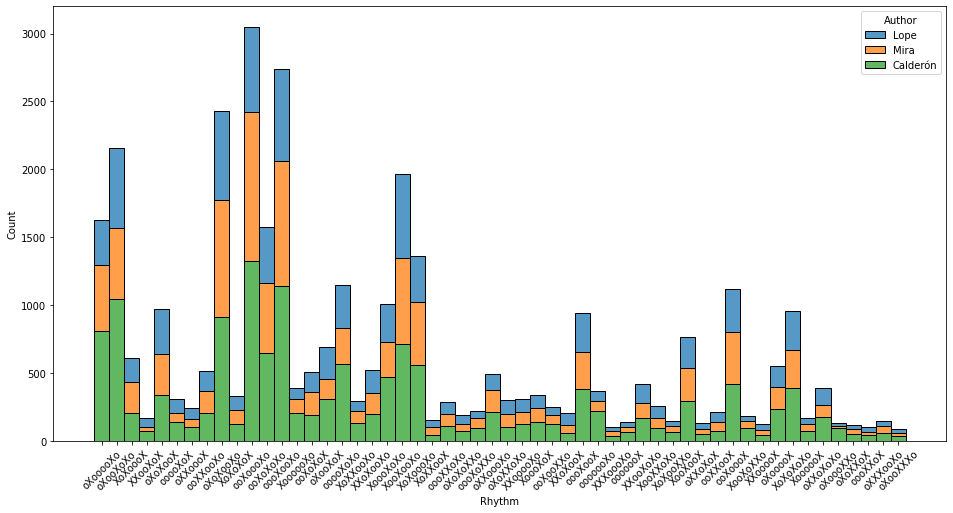

In [51]:
# Hustogram
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plot = sns.histplot(x='Rhythm', hue='Author', data=candidatesdf, multiple="stack") #, palette=paleta,multiple='stack'

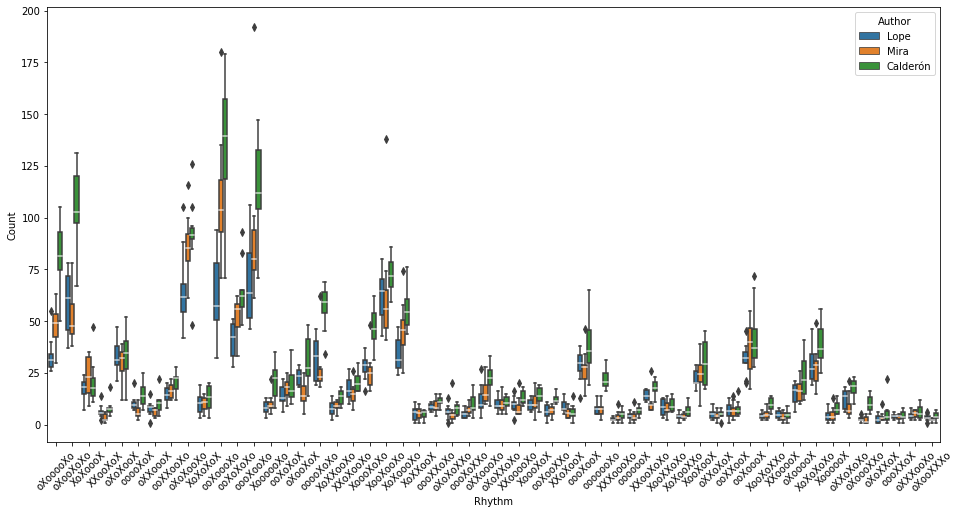

In [52]:
# Variance (boxes)
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plot = sns.boxplot(x='Rhythm', y='Count', hue='Author', data=dfcandidatescount, medianprops=dict(color="white", alpha=0.7))


In [53]:
# Long format (Eacxh rhtyhm is a column)
dflong = longformat(dfcount, 'Rhythm', 'Count')
dfcandidateslong = longformat(dfcandidatescount, 'Rhythm', 'Count')

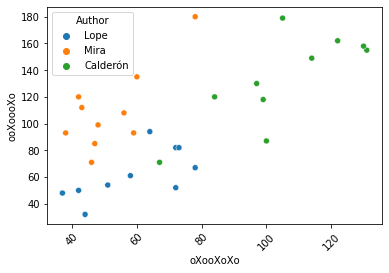

In [54]:
# Scatterplot (dots) --+---+-
plt.xticks(rotation=45)
plot = sns.scatterplot(data=dfcandidateslong, x='oXooXoXo', y='ooXoooXo', hue="Author") #    ooXoooXo oooXooXo oXooXoX oooXooXo oXooXoXo




******************************************
\Title:	X: La hidalga del valle

Regresion
Score: 1.0
['Calderón']

-------------------------------------------------------

SVN
Score: 1.0
['Calderón']

-------------------------------------------------------

Knn:



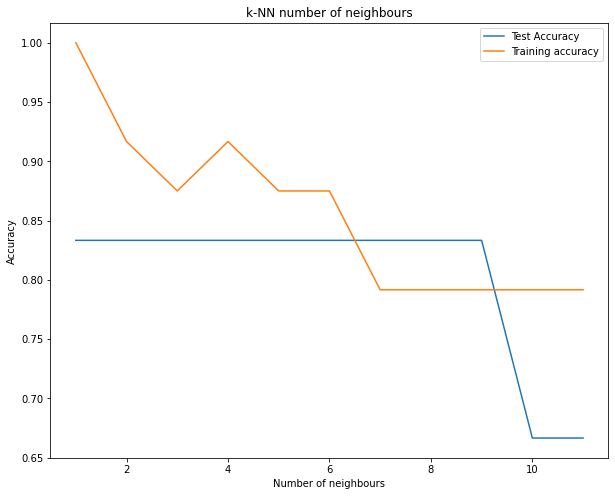

Score: 0.8333333333333334
['Calderón']


KNeighborsClassifier(n_neighbors=3)

In [55]:
# Logistic regresion k-NN & SVN
# PArameters sampling
testr = 0.01
testk = 0.2
tests = 0.01
# Randomisation factor ( I chose the answer to life, the universe and everything)
alea = 42
# Number of neighbours
kn = 3
# Just the required columns
data = dflong.drop('Title', axis=1)


#def analyse(tabla, j_test=pd.DataFrame(), test=0.2, alea = 42, plot='n', analisis='k',  n=12):
print(f'\n\n\n******************************************\n\Title:\tX: {dflong.loc[dflong["Author"] == "X"]["Title"].max()}\n')
trainer = data.loc[data['Author'].isin(candidates)]
to_test = data.loc[data['Author'] == 'X'].drop('Author', axis=1).values
    
print('Regresion')
analyse(trainer, to_test, 'r', testr, alea,'n', 3)
  
print('\n-------------------------------------------------------\n\nSVN')
    #testY = dfreglargo[dfreglargo['Autor'] == autor].drop('Autor', axis=1).values
analyse(trainer, to_test,  's', tests, alea, 'rbf')
    
print('\n-------------------------------------------------------\n\nKnn:\n')
analyse(trainer, to_test,  'k', testk, alea, 'y', kn)